In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Input:
df = pd.read_csv("Metazygia monitor 1.csv")
min_day=1440
total_time = len(df.index)
num_days = total_time//min_day
column=df.columns[2:]
display(df.head())

,Date_Time,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,...,Monitor 1 Spider 23,Monitor 1 Spider 24,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
0,2017-04-21 00:00:00,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,2,5,0,0,0
1,2017-04-21 00:01:00,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,5,10,0,0,0
2,2017-04-21 00:02:00,0,0,0,0,0,7,2,0,0,...,0,2,0,0,4,4,4,0,0,0
3,2017-04-21 00:03:00,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,5,4,0,0,0
4,2017-04-21 00:04:00,0,0,0,0,2,2,0,0,0,...,0,0,0,0,0,3,2,0,0,0


In [56]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

In [57]:
def plot_night_test(df):
#Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
#Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
#Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]

In [58]:
#Plot activity in subplots
#Input:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        #Run function to determine when lights are off during LD cycle
        else:
            plot_night_test(df1)
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')

In [59]:
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df):
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(0, len(column)):
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
        fig.suptitle(column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y)
        #plot x axis
        ax[num_days-1].set_xticks(range(0, min_day, 360))
        plt.xlabel('Time')
        #save figure
        #fig.savefig(column[spider] +'raster.jpg')
        #plt.show()
        print('Next spider')

Next spider
Next spider
Next spider
Next spider
Next spider
Next spider
Next spider


KeyboardInterrupt: 

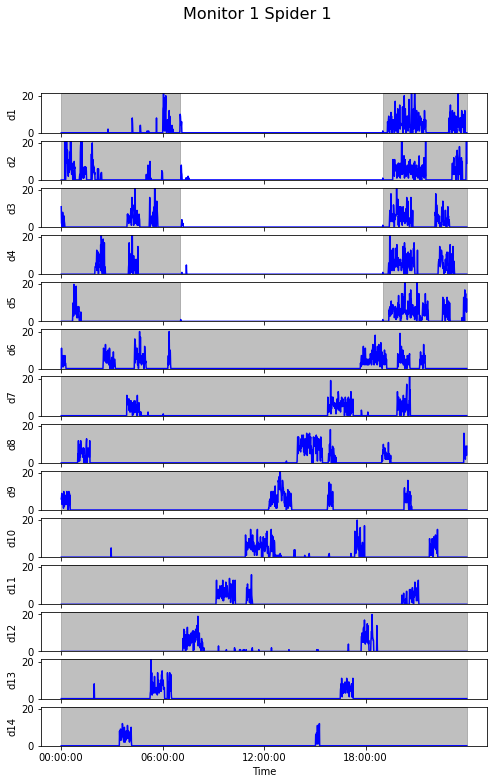

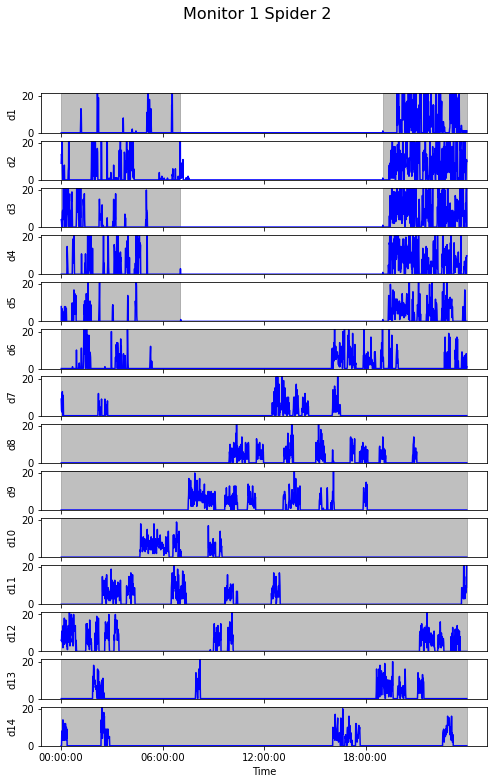

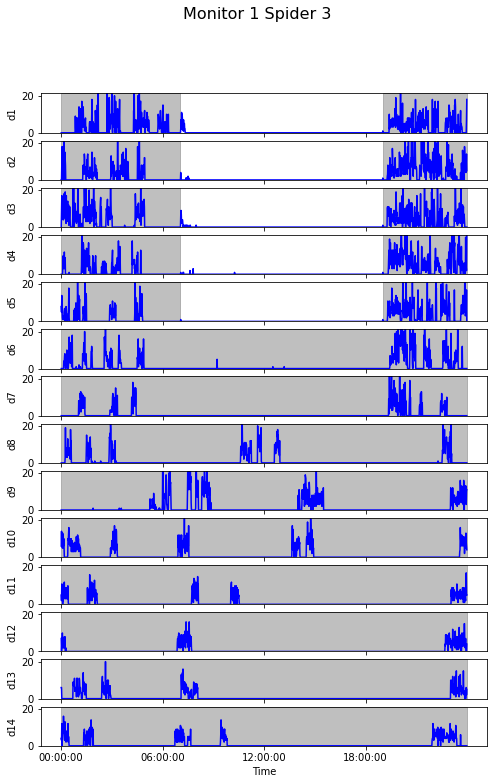

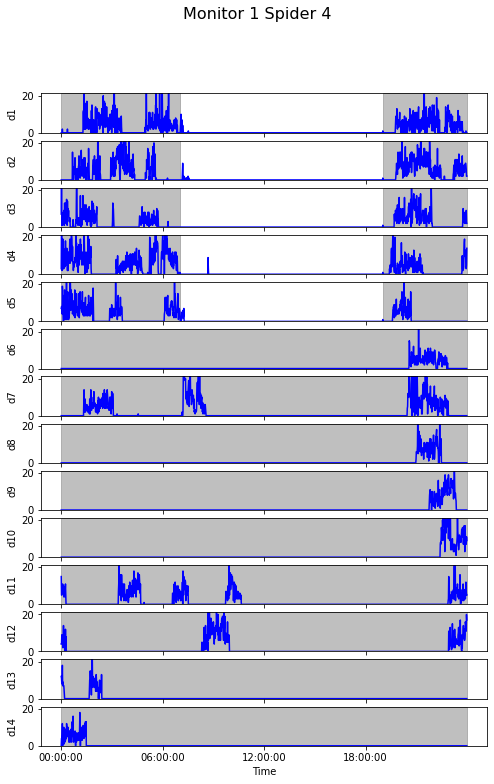

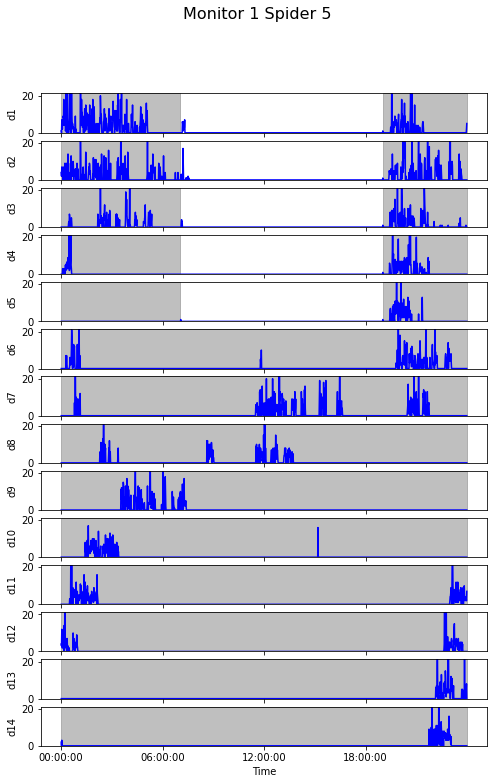

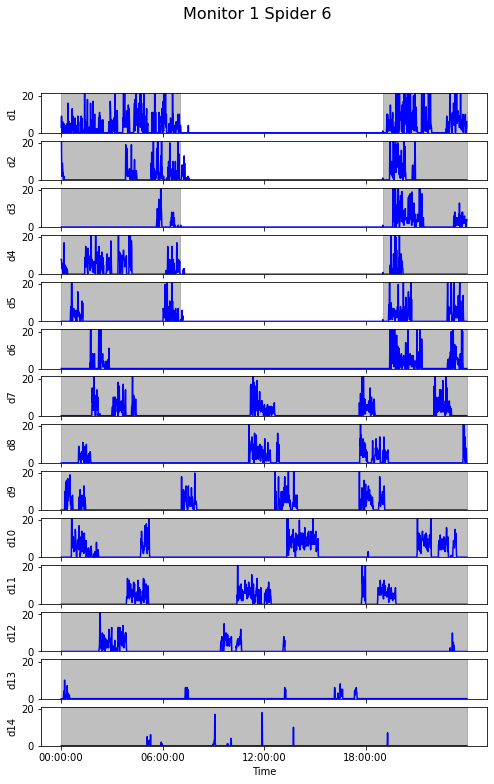

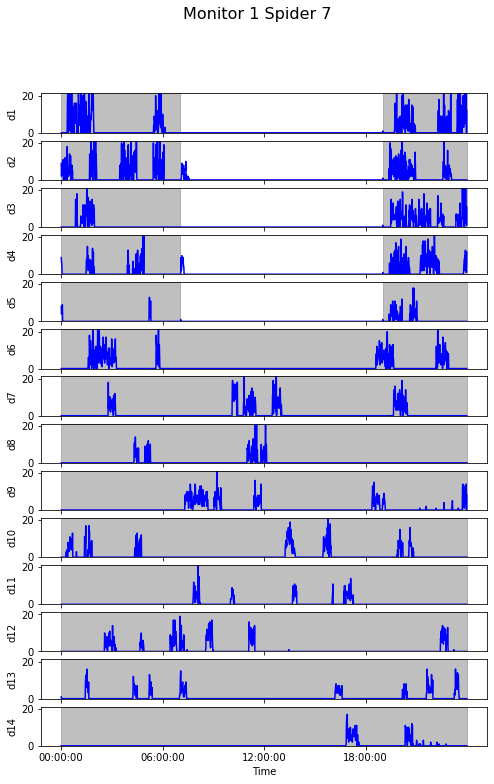

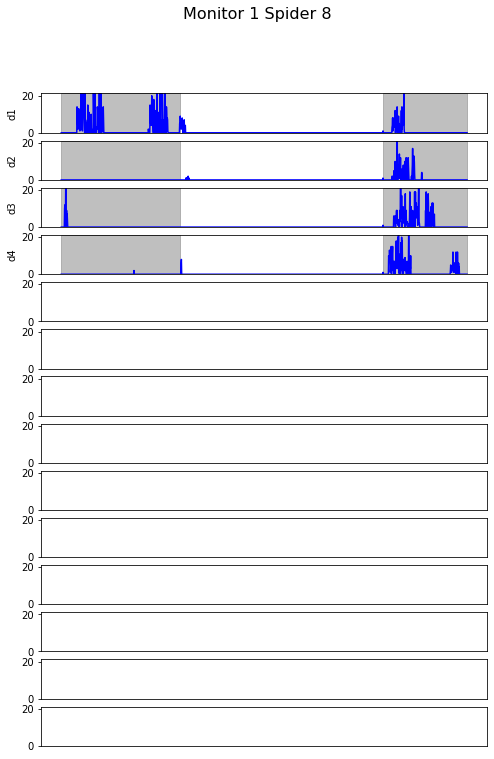

In [60]:
spider_raster(df)